In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers
import matplotlib.pyplot as plt

In [38]:
x_train = tfd.Normal(loc=[0, 2], scale=1).sample(1000)
w = 5
b = 1
eps = tfd.Normal(0,10).sample(1000)
y_train = x_train * w + b + tf.reshape(eps, (-1,1))

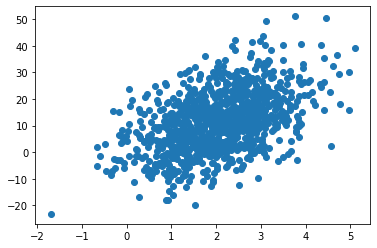

In [39]:
plt.scatter(x_train[:,1], y_train[:,1])

In [65]:
model = Sequential([
    Dense(1, input_shape=(2,)),
    tfpl.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1))
])

In [66]:
model.compile(loss='mse', optimizer='rmsprop')
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
32/32 [==============================] - 0s 596us/step - loss: 204.6985
Epoch 2/10
32/32 [==============================] - 0s 688us/step - loss: 177.7334
Epoch 3/10
32/32 [==============================] - 0s 620us/step - loss: 196.0063
Epoch 4/10
32/32 [==============================] - 0s 532us/step - loss: 180.7732
Epoch 5/10
32/32 [==============================] - 0s 540us/step - loss: 188.0046
Epoch 6/10
32/32 [==============================] - 0s 552us/step - loss: 198.4132
Epoch 7/10
32/32 [==============================] - 0s 666us/step - loss: 187.5046
Epoch 8/10
32/32 [==============================] - 0s 599us/step - loss: 196.9378
Epoch 9/10
32/32 [==============================] - 0s 599us/step - loss: 170.3921
Epoch 10/10
32/32 [==============================] - 0s 688us/step - loss: 191.6393


In [67]:
x_test = tfd.Normal(loc=[0, 2], scale=1).sample(16)
model(x_test)

<tfp.distributions.Normal 'sequential_8_distribution_lambda_3_Normal' batch_shape=[16, 1] event_shape=[] dtype=float32>

In [68]:
def nll(y_true, y_pred):
    return -y_pred.log_prob(y_true)

In [69]:
# This is equivalent to the cell above where we compile the model with 'mse' loss
# but now our model is probabilistic
model.compile(loss=nll, optimizer='rmsprop')
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
32/32 [==============================] - 0s 540us/step - loss: 94.3796
Epoch 2/10
32/32 [==============================] - 0s 591us/step - loss: 90.8206
Epoch 3/10
32/32 [==============================] - 0s 558us/step - loss: 89.0245
Epoch 4/10
32/32 [==============================] - 0s 607us/step - loss: 92.0867
Epoch 5/10
32/32 [==============================] - 0s 596us/step - loss: 88.3506
Epoch 6/10
32/32 [==============================] - 0s 613us/step - loss: 86.4404
Epoch 7/10
32/32 [==============================] - 0s 601us/step - loss: 86.3152
Epoch 8/10
32/32 [==============================] - 0s 618us/step - loss: 87.8089
Epoch 9/10
32/32 [==============================] - 0s 653us/step - loss: 83.8307
Epoch 10/10
32/32 [==============================] - 0s 615us/step - loss: 85.5902


In [71]:
# We can get predictions by sampling from this distribution
model(x_test).sample(5)

<tf.Tensor: shape=(5, 16, 1), dtype=float32, numpy=
array([[[ 2.9059088 ],
        [ 0.90893036],
        [ 2.6543064 ],
        [ 0.11188948],
        [ 2.6580715 ],
        [ 3.5059662 ],
        [-0.11039269],
        [ 4.6228395 ],
        [ 2.271117  ],
        [ 2.0711694 ],
        [ 1.7520448 ],
        [ 2.054507  ],
        [ 1.5865448 ],
        [ 1.8012009 ],
        [-0.5217096 ],
        [-0.41085225]],

       [[ 1.669672  ],
        [ 0.02627671],
        [ 2.345519  ],
        [ 1.4944527 ],
        [ 0.30473375],
        [ 1.3959577 ],
        [ 1.6399044 ],
        [ 3.132041  ],
        [ 0.54037774],
        [ 2.1369975 ],
        [ 3.2062907 ],
        [ 1.8701863 ],
        [ 1.5113091 ],
        [ 1.0612047 ],
        [-0.26092118],
        [-0.83601767]],

       [[ 0.4854982 ],
        [ 1.4018571 ],
        [ 3.108728  ],
        [ 1.9772842 ],
        [ 2.8287473 ],
        [ 0.64296675],
        [ 1.4824259 ],
        [ 2.4077656 ],
        [ 1.5983753 ],
 